# Time Evolution
Using what we learned from the effective Hamiltonian, it is now time to compute the density matrix. Recall that the density matrix (linearly mapped to a vector) absent any noise is given by:
$$
    \newcommand{ket}[1]{\left|#1\right\rangle}
    \newcommand{bra}[1]{\left\langle#1\right|}
    \vec{\rho}(t) = (R\otimes R)\left( \sum_{jk}e^{-i\omega_{jk}t}\ket{j}\bra{j}\otimes \ket{k}\bra{k} \right) (R^{-1}\otimes R^{-1})\vec{\rho}(0)
$$
with $R$ the eigenvector matrix and $\omega_{jk}$ the eigenvalues of the system.

## Single Donor, Single Mode-Single Photon
Again, the Hamiltonian in the single qubit case is:
$$
H = \hbar \omega_c a^\dagger a + \sum_j E_j \ket{j}\bra{j} + \frac{1}{2}g_c(a+a^\dagger)(1+Z)
$$
where $Z$ is defined as: 
$$
Z = \sum_{jk} z_{jk}\sigma_j\tau_j 
$$
$\omega_c$ is the cavity energy and $g_c$ is the photon-charge coupling strength. The eigenenergies up to second order in perturbation theory in the single qubit case are:
$$
        \begin{align}
            E_0 &= \frac{1}{2}(-\omega_0-\omega_B)-\frac{A}{8} \left(1-\cos \eta\right)-\frac{\Delta\omega_B}{4}\left(1+\cos \eta\right)-\frac{A^2}{16\omega_B}\left((1-\cos\eta)^2+\sin^2\eta(\frac{\omega_B}{4\omega_0}+\frac{\omega_B}{\omega_0+\omega_B}-\frac{\omega_B\Delta\omega_B}{A\omega_0}+\frac{\omega_B\Delta\omega_B^2}{A^2\omega_0})\right)\\
            E_1 &= \frac{1}{2}(-\omega_0+\omega_B)-\frac{A}{8} \left(1-\cos \eta\right)+\frac{\Delta\omega_B}{4}\left(1+\cos \eta\right)-\frac{A^2}{16\omega_B}\left(-(1-\cos\eta)^2+\sin^2\eta(\frac{\omega_B}{4\omega_0}+\frac{\omega_B}{\omega_0-\omega_B}+\frac{\omega_B\Delta\omega_B}{A\omega_0}+\frac{\omega_B\Delta\omega_B^2}{A^2\omega_0})\right) \\
            E_2 &= \frac{1}{2}( \omega_0-\omega_B)-\frac{A}{8} \left(1+\cos \eta\right)-\frac{\Delta\omega_B}{4}\left(1-\cos \eta\right)-\frac{A^2}{16\omega_B}\left((1+\cos\eta)^2+\sin^2\eta(-\frac{\omega_B}{4\omega_0}-\frac{\omega_B}{\omega_0-\omega_B}+\frac{\omega_B\Delta\omega_B}{A\omega_0}-\frac{\omega_B\Delta\omega_B^2}{A^2\omega_0})\right) \\
            E_3 &= \frac{1}{2}( \omega_0+\omega_B)-\frac{A}{8} \left(1+\cos \eta\right)+\frac{\Delta\omega_B}{4}\left(1-\cos \eta\right)-\frac{A^2}{16\omega_B}\left(-(1+\cos\eta)^2+\sin^2\eta(-\frac{\omega_B}{4\omega_0}-\frac{\omega_B}{\omega_0+\omega_B}-\frac{\omega_B\Delta\omega_B}{A\omega_0}-\frac{\omega_B\Delta\omega_B^2}{A^2\omega_0})\right)
        \end{align}
$$
and the coefficients of $Z$ are
$$
        \begin{align}
            z_{01} &= -A\omega_0\Delta\omega_B\cos\eta\sin^2\eta/4\omega_B(\omega_0^2-\omega_B^2) \\
            z_{03} &= A^2\omega_0^3\cos\eta\sin^2\eta/4\omega_B(\omega_0^2-\omega_B^2)^2 \\
            z_{10} &= \sin\eta + A\cos\eta\sin\eta/4\omega_0 \\
            z_{11} &= -A\omega_0\cos\eta\sin\eta/2(\omega_0^2-\omega_B^2) \\
            z_{13} &= -\Delta\omega_B\cos\eta\sin\eta/2\omega_0 \\
            z_{22} &= -A\omega_0^2\cos\eta\sin\eta/2\omega_B(\omega_0^2-\omega_B^2) \\
            z_{30} &= \cos\eta - A\sin^2\eta/4\omega_0 \\
            z_{31} &= A\omega_0\sin^2\eta/2(\omega_0^2-\omega_B^2) \\
            z_{33} &= \Delta\omega_B\sin^2\eta/2\omega_0 
        \end{align}
$$

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from scipy.linalg import expm
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
%matplotlib inline
# Import Pauli Matrices and System Constants
from _notebooks.pauli import *
from _notebooks.constants import *
# Import Flop-Flop Expressions
from _notebooks.flipflop import *

In [2]:
# # Initialize Constants
# '''
#     Units being used for analysis
#         Energy: GHz
#         Time  : ns
# '''
# N_p = 2  # Number of photon occupation states
# N_q = 4  # Number of flip-flop states per donor
# N_d = 1  # Number of donor qubits

# wc = 0.5 # GHz, TODO: Find actual value for this
# gc = 0.3 # GHz, TODO: Find actual value for this

# parameters_qubits = []
# for _ in np.arange(N_d):
#     parameters_qubits.append({'Vt':11.4, 'wB':11.3, 'eps':0})
# parameters_cavity = {'wc': wc , 'gc':gc}

# assert(len(parameters_qubits) == N_d)

# Z = []
# E = []
# for donor in np.arange(N_d):
#     energy = FlipFlopEnergies(parameters_qubits[donor])
#     Zcoef = ElectronPositionCoefficients(parameters_qubits[donor])
#     z = np.zeros((N_q,N_q))
#     for j in np.arange(N_q):
#         for k in np.arange(N_q):
#             z = z + np.kron(pauli[j],pauli[k])*Zcoef[j,k]
#     E.append(energy)
#     Z.append(z)

In [3]:
# # Build total Hamiltonian
# H_cavity = hbar*wc*np.kron(np.array([[0,0],[0,1]]),np.eye(N_q**N_d))
# H_qubit = np.zeros(N_p * np.power(N_q,N_d), N_p * np.power(N_q,N_d) )
# H_int = np.zeros(N_p * np.power(N_q,N_d), N_p * np.power(N_q,N_d) )
# H = np.zeros(N_p * np.power(N_q,N_d), N_p * np.power(N_q,N_d) )
# for donor in np.arange(N_d):
#     H_qubit = H_qubit + np.kron(np.kron(np.kron(np.eye(N_p),np.eye(np.power(N_q,donor))),E[donor]),np.eye(np.power(N_q,(N_d-1-donor))))
#     H_int = H_int + 0.5*gc* np.real( np.kron(np.kron(np.kron( sx ,np.power(N_q,donor) ), (np.eye(N_q) + Z[donor])) ,np.eye(np.power(N_q,(N_d-1-donor))) ))
# H = H_cavity + H_qubit + H_int
# print(H_int)

In [4]:
# # Get eigenvalues and eigenvectors
# W, R = np.linalg.eig(H)

Time to put everything to together to compute the time evolution. Again, to reduce scrolling,
$$
    \vec{\rho}(t) = (R\otimes R)\left( \sum_{jk}e^{-i\omega_{jk}t}\ket{j}\bra{j}\otimes \ket{k}\bra{k} \right) (R^{-1}\otimes R^{-1})\vec{\rho}(0)
$$

In [5]:
# # Initial states
# initial_cavity_state = np.array([[1,0]]).transpose()
# initial_flipflop_state = np.array([[0,1,0,0]]).transpose()
# initial_total_state = np.kron(initial_cavity_state,initial_flipflop_state)
# initial_rho = np.kron(initial_total_state.transpose(),initial_total_state)
# initial_rho_vec = initial_rho.flatten()

Computing the density matrix element amounts to computing 3 matrices:
$$ R\otimes R $$
$$ \sum_{jk}e^{-i\omega_{jk}t}\ket{j}\bra{j}\otimes \ket{k}\bra{k} $$
$$ R^{-1}\otimes R^{-1} $$

In [6]:
# # R matrices in Liouville-Fock space
# RR = np.kron(R,R)
# R_inv = np.linalg.inv(R)
# RR_INV = np.kron(R_inv,R_inv)
# # Oscillating term in L-F space. This guy is time dependent. We'll shape this as (N_t, ROW, COLS)
# N_t = 500
# T_Max = 200
# t = np.arange(0,T_Max,T_Max/N_t)
# W_mat = np.kron(np.diag(W),np.eye(8))-np.kron(np.eye(8),np.diag(W))
# eiwt = np.zeros((N_t,64,64))
# for i, time in enumerate(t):
#     eiwt[i,:,:] = expm(-1j * W_mat * time)

In [7]:
# # Multiply everything together and reshape back to matrix of shape (N_t, 8, 8)
# rho = (np.matmul(np.matmul(np.matmul(RR,eiwt),RR_INV),initial_rho_vec)).reshape(N_t,8,8)

We actually don't care so much about the photon number so we should trace out that degree of freedom.
$$
    \rho_{\textrm{ff}}(t) = \textrm{Tr}_c(\rho(t))
$$

In [8]:
# rho_tensor = rho.reshape(N_t, N_c, N_q**N_d, N_c, N_q**N_d)
# rho_ff = np.trace(rho_tensor, axis1 = 1, axis2 = 3)
# rho_cav = np.trace(rho_tensor, axis1 = 2, axis2 = 4)

Now that we have the density matrix, it's time to plot some figures to analyze the physics

In [9]:
# fig=plt.figure(figsize=(16,10))
# ax = fig.add_subplot(111)
# ax.plot(t,rho_cav[:,1,1], label='Bright', color = 'red')
# ax.plot(t,rho_cav[:,0,0], label='Dark', color = 'black')
# ax.set_xlabel('Time (ns)')
# ax.set_ylabel('')
# ax.set_title('Cavity Occupation')
# plt.legend(loc=0)
# plt.show()

In [10]:
# fig=plt.figure(figsize=(16,10))
# ax = fig.add_subplot(111)
# ax.plot(t,rho_ff[:,0,0], label='0')
# ax.plot(t,rho_ff[:,1,1], label='1')
# ax.plot(t,rho_ff[:,2,2], label='2')
# ax.plot(t,rho_ff[:,3,3], label='3')
# ax.set_xlabel('Time (ns)')
# ax.set_ylabel('')
# ax.set_title('Flip-Flop Population')
# plt.legend(loc=0)
# plt.show()

If we want to extend this to multiple donors, let's encapsulate all of the calculations into a single function that returns the density matrix.

In [11]:
def computeDensityMatrixZeroNoise(initial_state , N_t, T_Max, N_d, parameters_qubits, parameters_cavity):
    '''
    Units being used for analysis
        Energy: GHz
        Time  : ns
    Arguments:
        initial_state : array of shape (N_p * N_q**N_d, 1)
        N_t : Number of time steps
        T_Max : Max time
        N_d : Number of donors
        parameters_qubits : list of size N_d dicts containing tunable parameters
            {'Vt','wB','eps'}
        parameters_cavity : dict containing cavity parameters
            {'wc', 'gc',}
    Returns:
        t : time sequence
        rho_ff: array of shape (N_t, N_q**N_d, N_q**N_d)
        rho_cav: array of shape (N_t, N_p, N_p)
    '''
    N_p = 2  # Number of photon occupation states
    N_q = 4  # Number of flip-flop states per donor
    N_dims = N_p * N_q**N_d
    # print(N_dims)
    assert(len(parameters_qubits) == N_d)
    assert(initial_state.shape[0] == N_dims)
    # Initialize variables
    Z = []
    E = []
    for donor in np.arange(N_d):
        energy = FlipFlopEnergies(parameters_qubits[donor])
        Zcoef = ElectronPositionCoefficients(parameters_qubits[donor])
        z = np.zeros((N_q,N_q))
        for j in np.arange(N_q):
            for k in np.arange(N_q):
                z = z + np.kron(pauli[j],pauli[k])*Zcoef[j,k]
        E.append(energy)
        Z.append(z)
    # Build total Hamiltonian
    H_cavity = hbar*wc*np.kron(np.array([[0,0],[0,1]]),np.eye(N_q**N_d))
    H_qubit = np.zeros((N_p * np.power(N_q,N_d), N_p * np.power(N_q,N_d) ))
    H_int = np.zeros((N_p * np.power(N_q,N_d), N_p * np.power(N_q,N_d) ))
    H = np.zeros(N_p * np.power(N_q,N_d), N_p * np.power(N_q,N_d) )
    for donor in np.arange(N_d):
        H_qubit = H_qubit + np.kron(np.kron(np.kron(np.eye(N_p),np.eye(np.power(N_q,donor))),E[donor]),np.eye(np.power(N_q,(N_d-1-donor))))
        H_int = H_int + 0.5*gc* np.real( np.kron(np.kron(np.kron( sx ,np.eye(np.power(N_q,donor)) ), (np.eye(N_q) + Z[donor])) ,np.eye(np.power(N_q,(N_d-1-donor))) ))
    H = H_cavity + H_qubit + H_int
    # Get eigenvalues and eigenvectors
    W, R = np.linalg.eig(H)
    # Initial density matrix
    initial_rho = np.kron(initial_state.transpose(),initial_total_state)
    initial_rho_vec = initial_rho.flatten()
    # R matrices in Liouville-Fock space
    RR = np.kron(R,R)
    R_inv = np.linalg.inv(R)
    RR_INV = np.kron(R_inv,R_inv)
    # Oscillating term in L-F space. This guy is time dependent. We'll shape this as (N_t, ROW, COLS)
    t = np.arange(0,T_Max,T_Max/N_t)
    W_mat = np.kron(W,np.ones(N_dims))-np.kron(np.ones(N_dims),W)
    eiwt = np.zeros((N_t,(N_dims)**2,(N_dims)**2))
    for i, time in enumerate(t):
        eiwt[i,:,:] = np.diag(np.exp(-1j * W_mat * time))
    # Multiply everything together and reshape back to matrix of shape (N_t, 8, 8)
    rho = (np.matmul(np.matmul(np.matmul(RR,eiwt),RR_INV),initial_rho_vec)).reshape(N_t,N_dims,N_dims)
    rho_tensor = rho.reshape(N_t, N_p, N_q**N_d, N_p, N_q**N_d)
    rho_ff = np.trace(rho_tensor, axis1 = 1, axis2 = 3)
    rho_cav = np.trace(rho_tensor, axis1 = 2, axis2 = 4)
    return t, rho_ff, rho_cav

In [12]:
# Test function to make sure we get the same result as before
initial_cavity_state = np.array([[1,0]]).transpose()
initial_flipflop_state = np.array([[0,1,0,0]]).transpose()
initial_total_state = np.kron(initial_cavity_state,initial_flipflop_state)
N_d = 1  # Number of donor qubits
wc = 0.5 # GHz, TODO: Find actual value for this
gc = 0.3 # GHz, TODO: Find actual value for this
parameters_qubits = []
for _ in np.arange(N_d):
    parameters_qubits.append({'Vt':11.4, 'wB':11.3, 'eps':0})
parameters_cavity = {'wc': wc , 'gc':gc}
N_t = 500
T_Max = 200
t, rho_ff, rho_cav = computeDensityMatrixZeroNoise(initial_total_state , N_t, T_Max, N_d, parameters_qubits, parameters_cavity)
print(rho_ff.shape)
print(rho_cav.shape)

(500, 4, 4)
(500, 2, 2)
/Library/Python/3.7/site-packages/ipykernel_launcher.py:61: ComplexWarning: Casting complex values to real discards the imaginary part


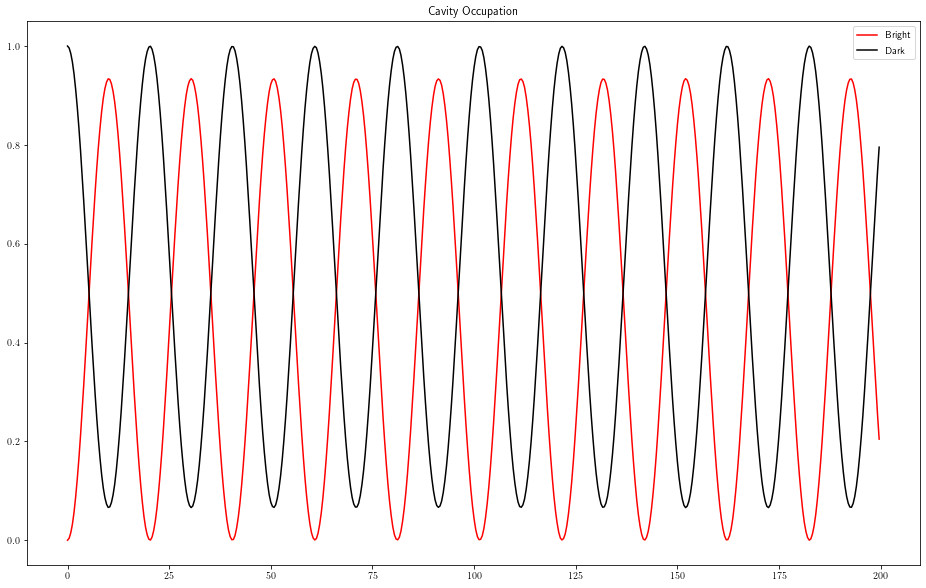

In [13]:
fig=plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.plot(t,rho_cav[:,1,1], label='Bright', color = 'red')
ax.plot(t,rho_cav[:,0,0], label='Dark', color = 'black')
# ax.set_xlabel('Time (ns)')?
ax.set_ylabel('')
ax.set_title('Cavity Occupation')
plt.legend(loc=0)
plt.show()

## Two Donor, One Photon
Now we want to check for multi-qubit coupling mediated by this cavity. We've also seen that it should be possible in the effective Hamiltonian.
$$
H_{2q} = \hbar \omega_c a^\dagger a + \sum_i\sum_j E_{ij} \ket{j}_i\bra{j}_i + \sum_i\frac{1}{2}g_c(a+a^\dagger)(1+Z_i)
$$

In [14]:
initial_cavity_state = np.array([[1,0]]).transpose()
initial_flipflop_state = np.array([[0,1,0,0,
                                    0,0,0,0,
                                    0,0,0,0,
                                    0,0,0,0]]).transpose()
initial_flipflop_state = initial_flipflop_state / np.linalg.norm(initial_flipflop_state)
initial_total_state = np.kron(initial_cavity_state,initial_flipflop_state)
N_d = 2  # Number of donor qubits
wc = 0.5 # GHz, TODO: Find actual value for this
gc = 0.3 # GHz, TODO: Find actual value for this
parameters_qubits = []
for _ in np.arange(N_d):
    parameters_qubits.append({'Vt':11.4, 'wB':11.3, 'eps':0})
parameters_cavity = {'wc': wc , 'gc':gc}
N_t = 500
T_Max = 10000
t, rho_ff, rho_cav = computeDensityMatrixZeroNoise(initial_total_state , N_t, T_Max, N_d, parameters_qubits, parameters_cavity)
print(rho_ff.shape)
print(rho_cav.shape)

/Library/Python/3.7/site-packages/ipykernel_launcher.py:61: ComplexWarning: Casting complex values to real discards the imaginary part
(500, 16, 16)
(500, 2, 2)


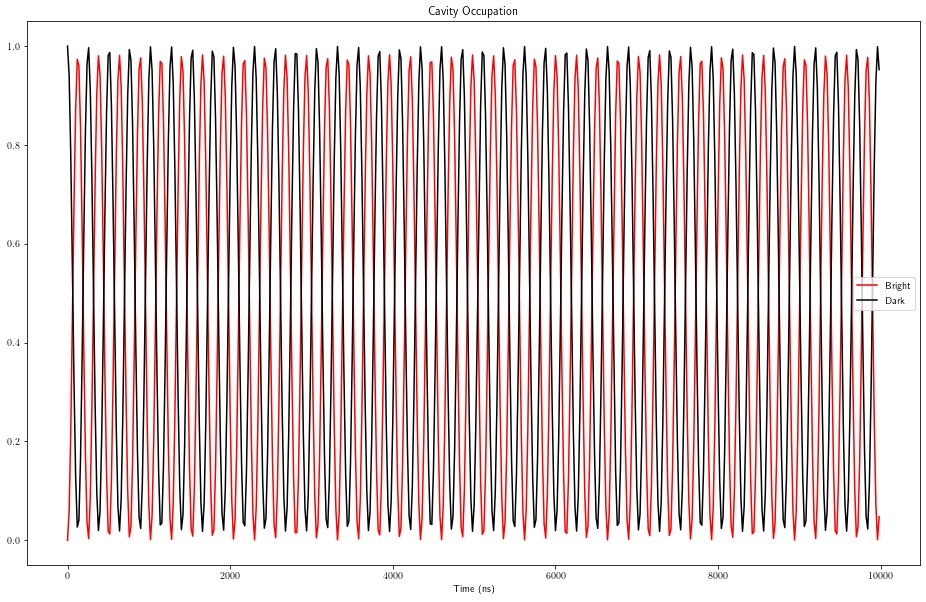

In [15]:
fig=plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.plot(t,rho_cav[:,1,1], label='Bright', color = 'red')
ax.plot(t,rho_cav[:,0,0], label='Dark', color = 'black')
ax.set_xlabel('Time (ns)')
ax.set_ylabel('')
ax.set_title('Cavity Occupation')
plt.legend(loc=0)
plt.show()

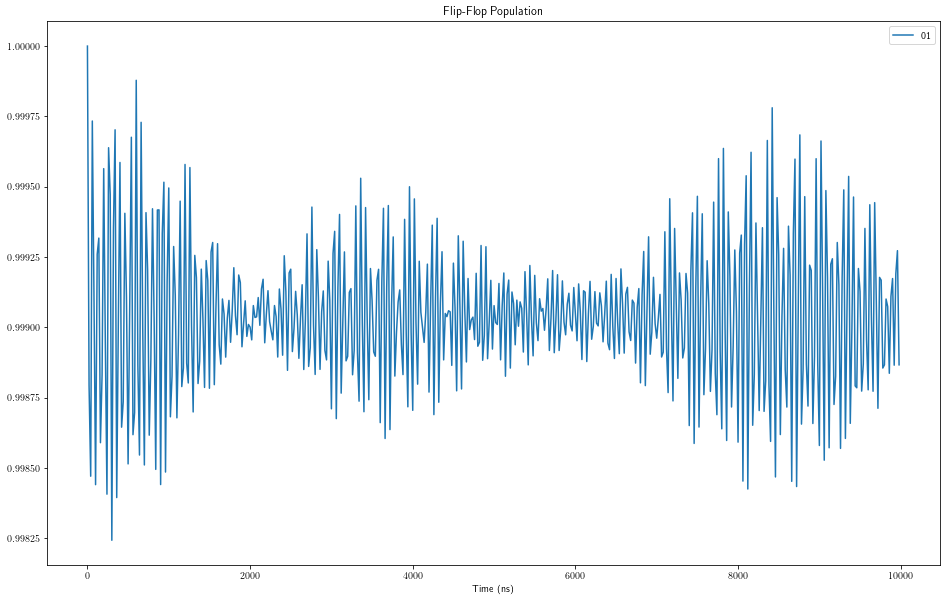

In [16]:
fig=plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
# ax.plot(t,rho_ff[:,0,0], label='00')
ax.plot(t,rho_ff[:,1,1], label='01')
# ax.plot(t,rho_ff[:,2,2], label='02')
# ax.plot(t,rho_ff[:,3,3], label='03')
# ax.plot(t,rho_ff[:,4,4], label='10')
# ax.plot(t,rho_ff[:,5,5], label='11')
# ax.plot(t,rho_ff[:,6,6], label='12')
# ax.plot(t,rho_ff[:,7,7], label='13')
# ax.plot(t,rho_ff[:,8,8], label='20')
# ax.plot(t,rho_ff[:,9,9], label='21')
# ax.plot(t,rho_ff[:,10,10], label='22')
# ax.plot(t,rho_ff[:,11,11], label='23')
# ax.plot(t,rho_ff[:,12,12], label='30')
# ax.plot(t,rho_ff[:,13,13], label='31')
# ax.plot(t,rho_ff[:,14,14], label='32')
# ax.plot(t,rho_ff[:,15,15], label='33')
ax.set_xlabel('Time (ns)')
ax.set_ylabel('')
ax.set_title('Flip-Flop Population')
plt.legend(loc=0)
plt.show()

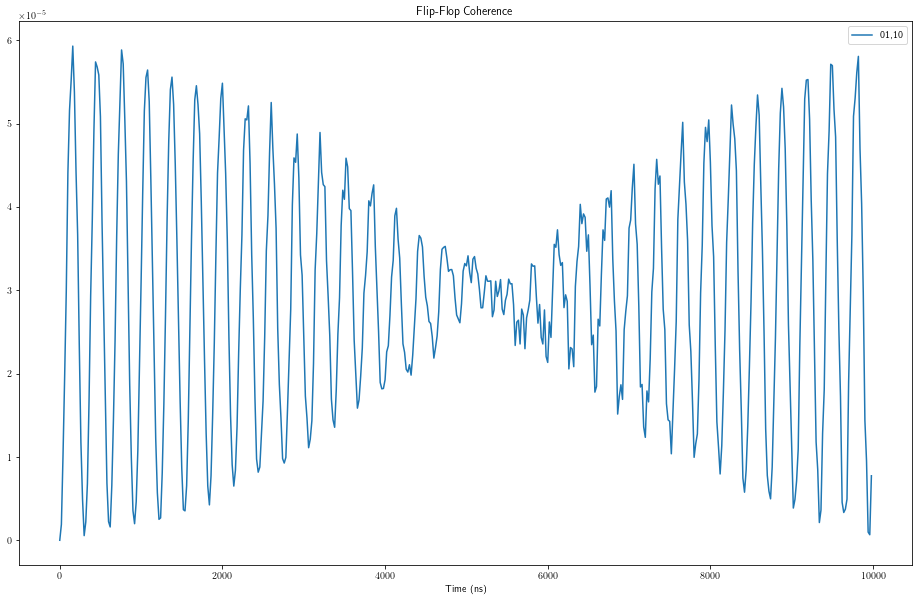

In [17]:
fig=plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.plot(t,np.abs(rho_ff[:,1,4]), label='01,10')
ax.set_xlabel('Time (ns)')
ax.set_ylabel('')
ax.set_title('Flip-Flop Coherence')
plt.legend(loc=0)
plt.show()